1. Imports
2. Load Dataset
3. Quick Data Check
4. Train-Test Split
5. Baseline Model
6. Tree-Based Models
7. Boosting Models
8. Evaluation
9. Visualization
10. Hyperparameter Tuning
11. Final Comparison & Conclusion

In [27]:
!pip install xgboost -q

In [56]:
# Core
import numpy as np
import pandas as pd

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Models
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from xgboost import XGBRegressor

# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV

import warnings
warnings.filterwarnings("ignore")


In [61]:
data = load_diabetes(as_frame=True)
df = data.frame
print("=== QUICK DATA CHECK ===")
print(f"Dataset shape       : {df.shape}")
print(f"Missing values      : {df.isnull().sum().sum()}")
print(f"Duplicate rows      : {df.duplicated().sum()}")
print("\nColumns:")
print(df.columns.tolist())
print("\nSample rows:")
df.head()



=== QUICK DATA CHECK ===
Dataset shape       : (442, 11)
Missing values      : 0
Duplicate rows      : 0

Columns:
['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6', 'target']

Sample rows:


,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [93]:
print("=== QUICK EDA ===")
print(f"Shape: {df.shape}")
print(f"Missing: {df.isnull().sum().sum()}")
print(f"Duplicates: {df.duplicated().sum()}")

=== QUICK EDA ===
Shape: (442, 11)
Missing: 0
Duplicates: 0


In [95]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


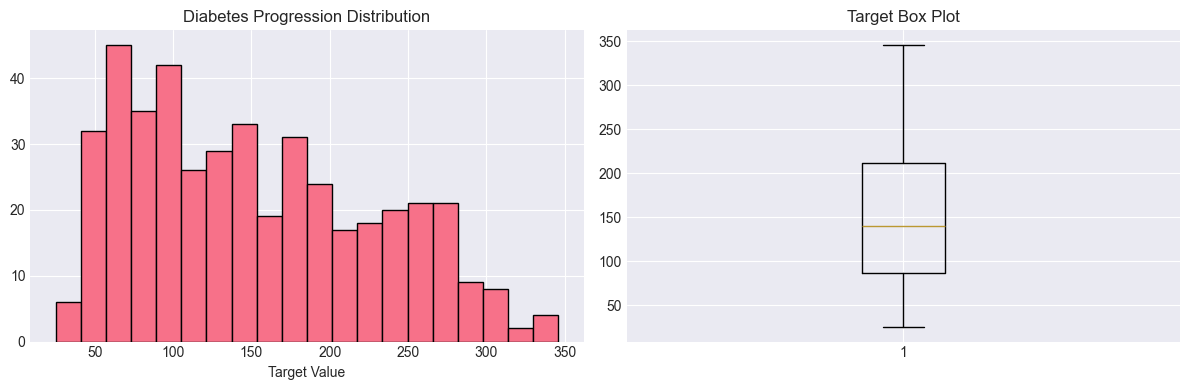

Target range: 25.0 to 346.0
Target mean: 152.1


In [100]:
# Target distribution
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(df['target'], bins=20, edgecolor='black')
plt.title('Diabetes Progression Distribution')
plt.xlabel('Target Value')

plt.subplot(1, 2, 2)
plt.boxplot(df['target'])
plt.title('Target Box Plot')

plt.tight_layout()
plt.show()

print(f"Target range: {df['target'].min():.1f} to {df['target'].max():.1f}")
print(f"Target mean: {df['target'].mean():.1f}")

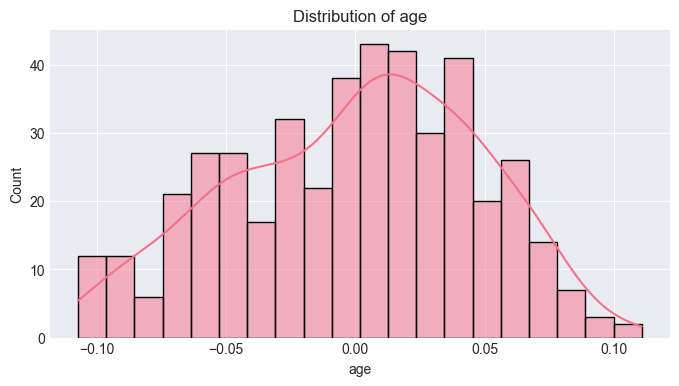

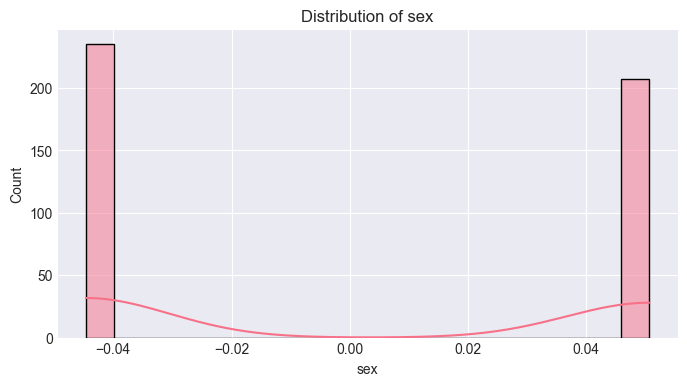

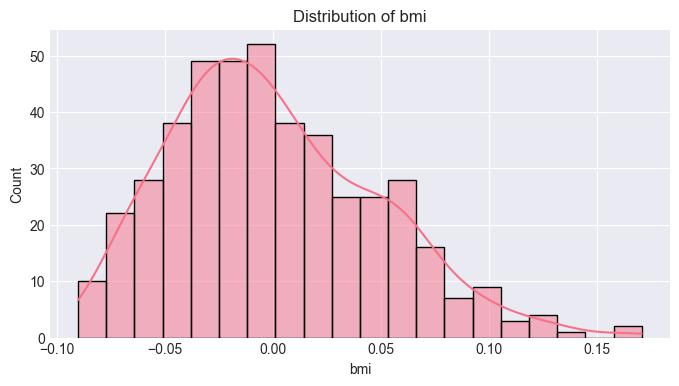

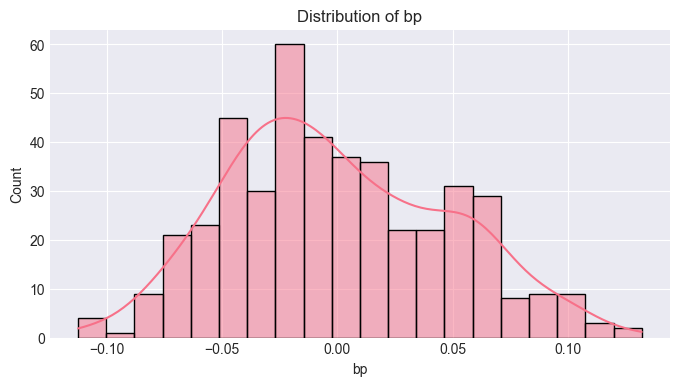

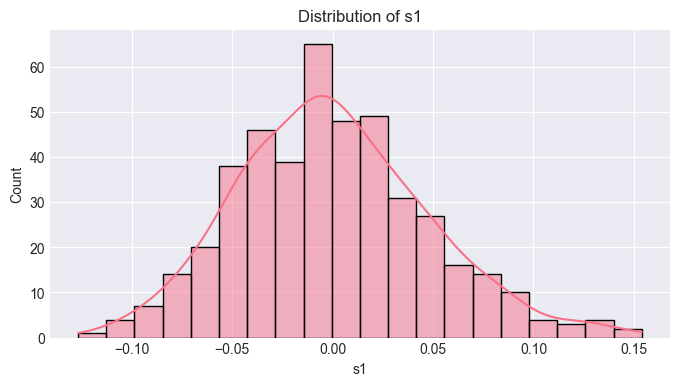

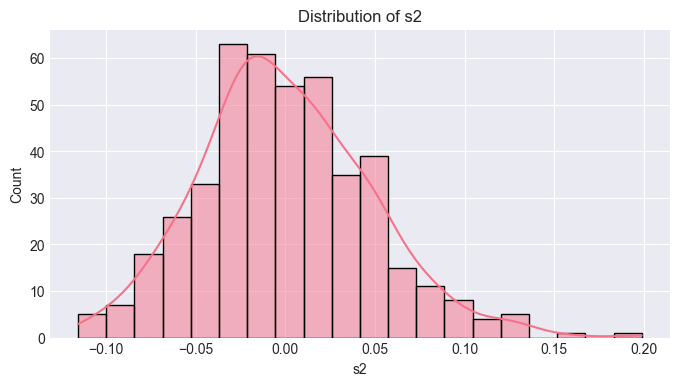

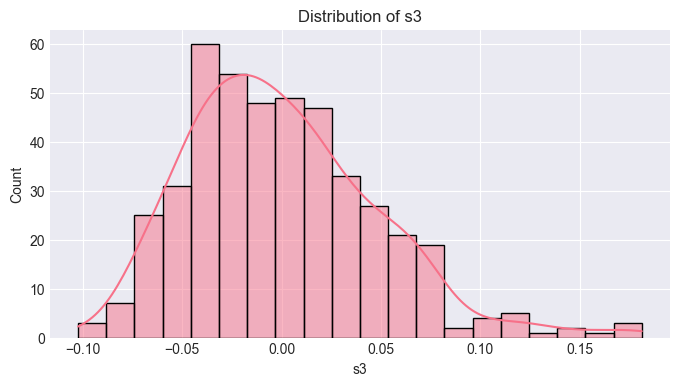

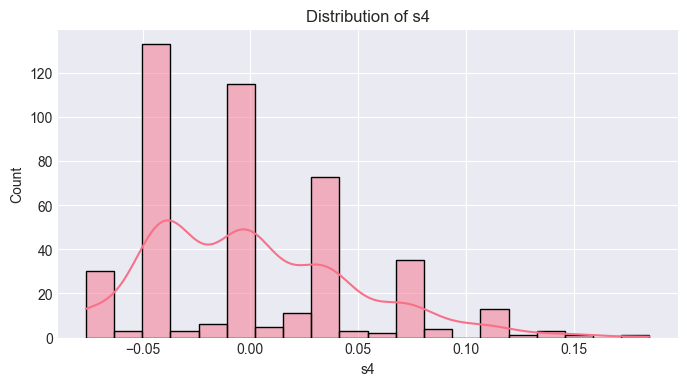

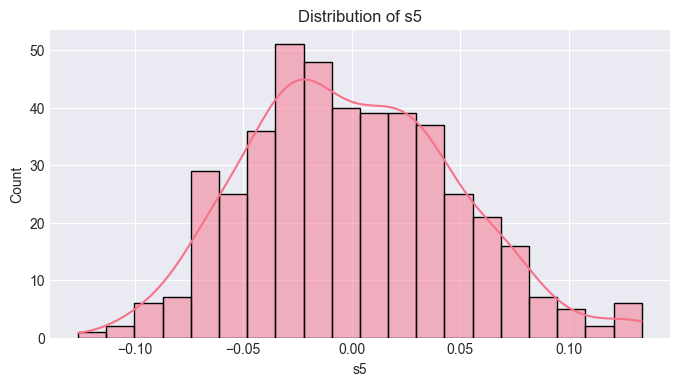

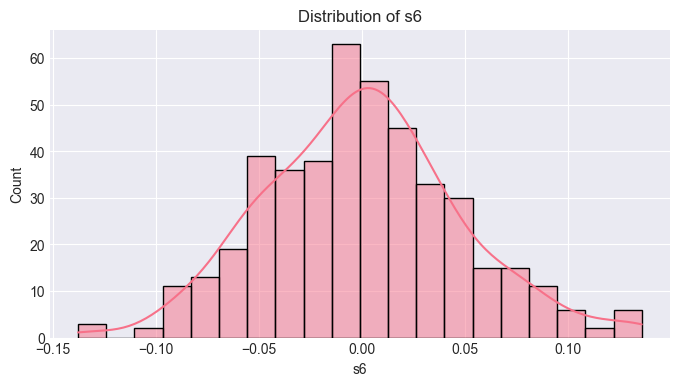

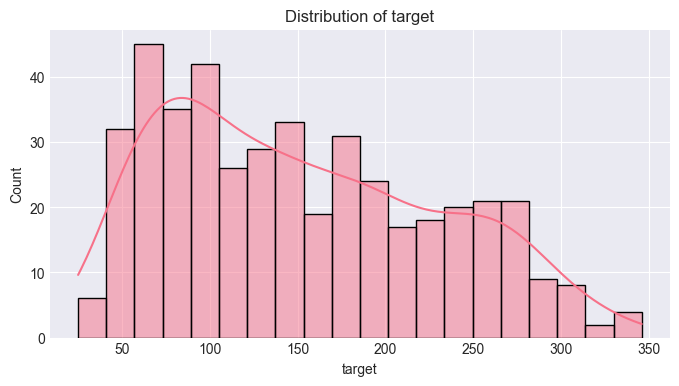

In [103]:
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = df.select_dtypes(include='number').columns

for col in numeric_cols:
    plt.figure(figsize=(8,4))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

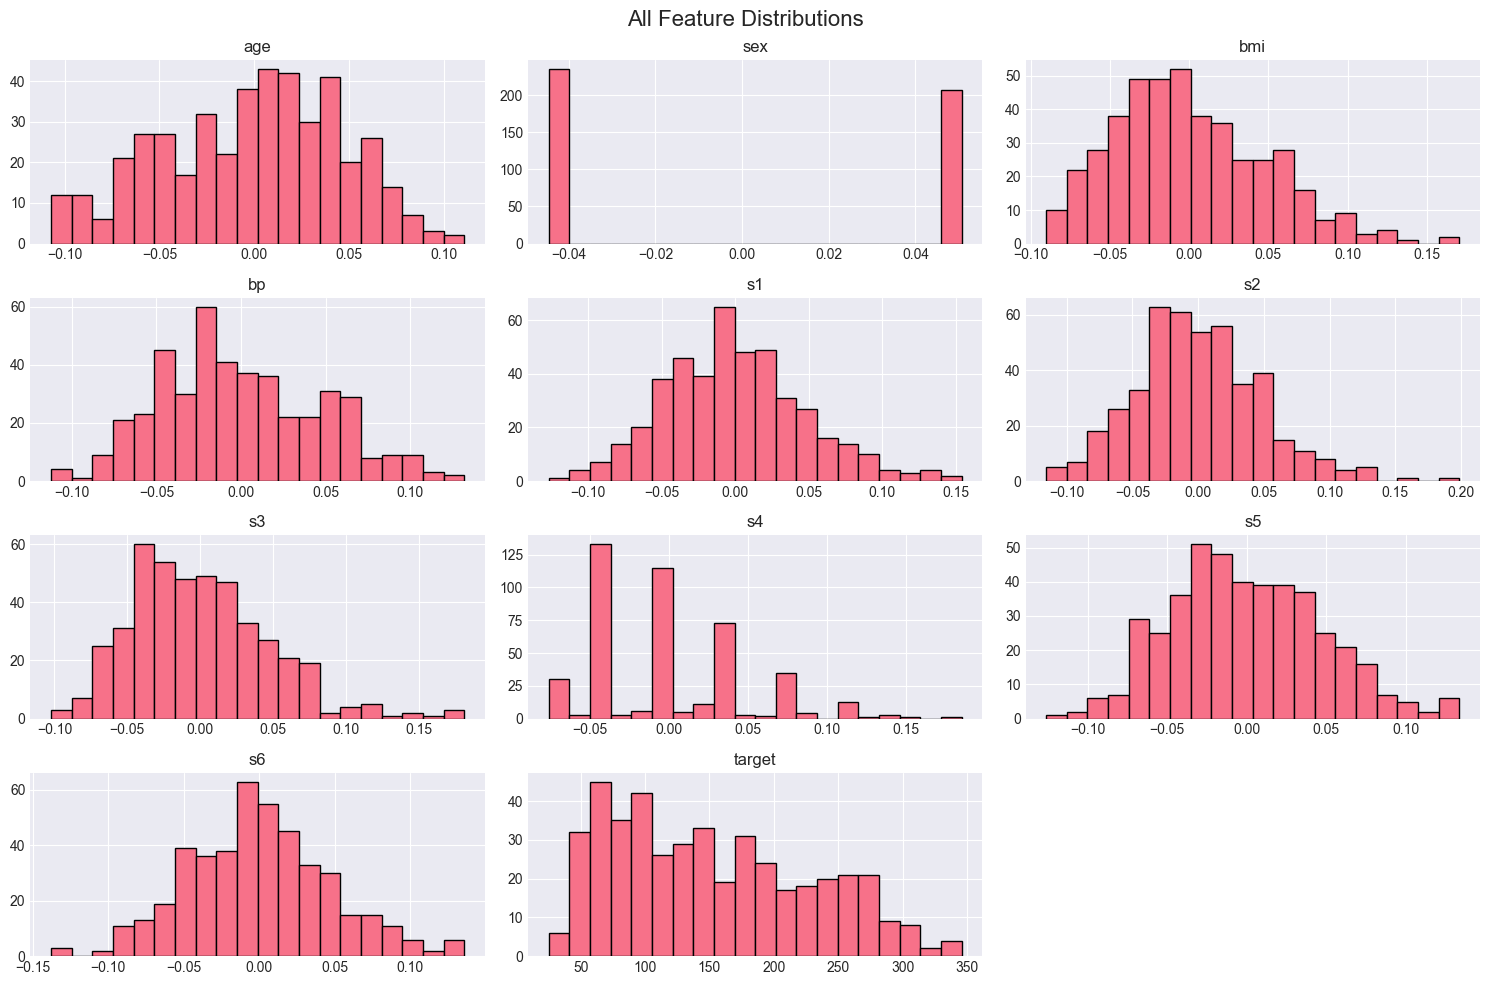

In [107]:
# View all feature distributions in one command
df.hist(figsize=(15, 10), bins=20, edgecolor='black')
plt.suptitle('All Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [62]:
X = df.drop('target', axis=1)
y = df['target']

In [63]:
from sklearn.model_selection import train_test_split

# Use stratify parameter for classification, random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42  # This ensures same split every time
)

In [8]:
X = df.drop('target', axis=1)
y = df['target']

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [64]:
models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(
        n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42
    ),
    "AdaBoost": AdaBoostRegressor(
        n_estimators=100, learning_rate=0.1, random_state=42
    ),
    "XGBoost": XGBRegressor(
        n_estimators=200, learning_rate=0.05, max_depth=4, random_state=42
    )
}

for model in models.values():
    model.fit(X_train, y_train)


In [65]:
def simple_evaluate(model, X_test, y_test):
    y_pred = model.predict(X_test)

    return {
        "RMSE": np.sqrt(mean_squared_error(y_test, y_pred)),
        "MAE": mean_absolute_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }


In [67]:
results = {}
for name, model in models.items():
    results[name] = simple_evaluate(model, X_test, y_test)
results_df = pd.DataFrame(results).T
results_df

,RMSE,MAE,R2
Decision Tree,70.546423,54.528090,0.060654
Gradient Boosting,53.837131,44.603297,0.452934
AdaBoost,53.144712,43.497180,0.466916
XGBoost,56.985486,46.115030,0.387080


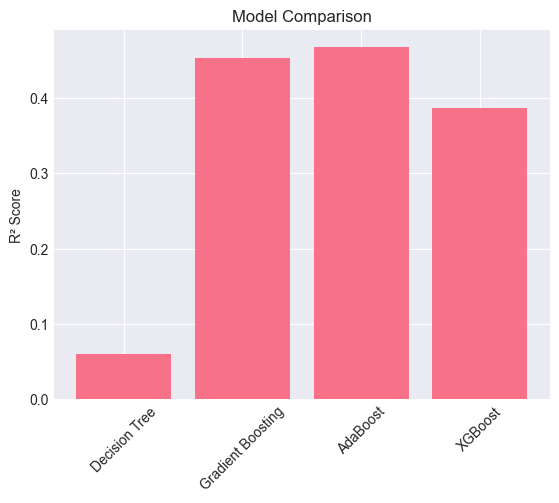

In [68]:
r2_scores = [results[m]["R2"] for m in results]
plt.bar(results.keys(), r2_scores)
plt.ylabel("R² Score")
plt.title("Model Comparison")
plt.xticks(rotation=45)
plt.show()

In [70]:
param_grid = { "n_estimators": [100, 200],
    "learning_rate": [0.05, 0.1],
    "max_depth": [3, 4]}	
grid = GridSearchCV(
    XGBRegressor(random_state=42),
    param_grid,
    cv=3,
    scoring="r2",
    n_jobs=-1
)

grid.fit(X_train, y_train)

,estimator,"XGBRegressor(...ree=None, ...)"
,param_grid,"{'learning_rate': [0.05, 0.1], 'max_depth': [3, 4], 'n_estimators': [100, 200]}"
,scoring,'r2'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,objective,'reg:squarederror'


Conclusion

Decision Tree overfits and performs worst

Boosting methods significantly improve performance

XGBoost performs best due to:

Regularization

Better optimization

Shrinkage via learning rate

Hyperparameter tuning further improves generalization

In [71]:
# Unit Tests for Models
import joblib
from sklearn.datasets import load_diabetes
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np
import os

# Test if models are trained and predictions are generated correctly
def test_model_training():
    assert "XGBoost" in models, "XGBoost model not found in models dictionary"
    assert models["XGBoost"].fit(X_train, y_train), "XGBoost training failed"

def test_prediction_shape():
    preds = models["XGBoost"].predict(X_test)
    assert preds.shape[0] == X_test.shape[0], "Prediction shape mismatch"

def test_saved_model():
    joblib.dump(models["XGBoost"], "xgb_model.pkl")
    assert os.path.exists("xgb_model.pkl"), "Saved model file not found"
    loaded_model = joblib.load("xgb_model.pkl")
    preds = loaded_model.predict(X_test)
    assert preds.shape[0] == X_test.shape[0], "Loaded model prediction shape mismatch"

# Run the tests
test_model_training()
test_prediction_shape()
test_saved_model()

In [72]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(models["XGBoost"], X, y, cv=5, scoring="r2")
print(f"Cross-validated R²: {scores.mean():.3f} ± {scores.std():.3f}")

Cross-validated R²: 0.371 ± 0.054


In [73]:
best_model = grid.best_estimator_
y_pred = best_model.predict(X_test)
print(f"Test R²: {r2_score(y_test, y_pred):.3f}")
print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred)):.3f}")

Test R²: 0.468
Test RMSE: 53.071


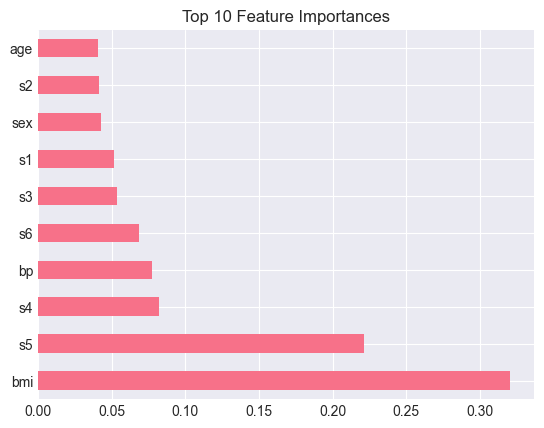

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns

feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).head(10).plot(kind="barh")
plt.title("Top 10 Feature Importances")
plt.show()

In [76]:
pip install shap

   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ---------------------------------------- 0.0/547.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.0 kB ? eta -:--:--
   ------------------- -------------------- 262.1/547.0 kB ? eta -:--:--
   ---------------------------------------- 547.0/547.0 kB 260.4 kB

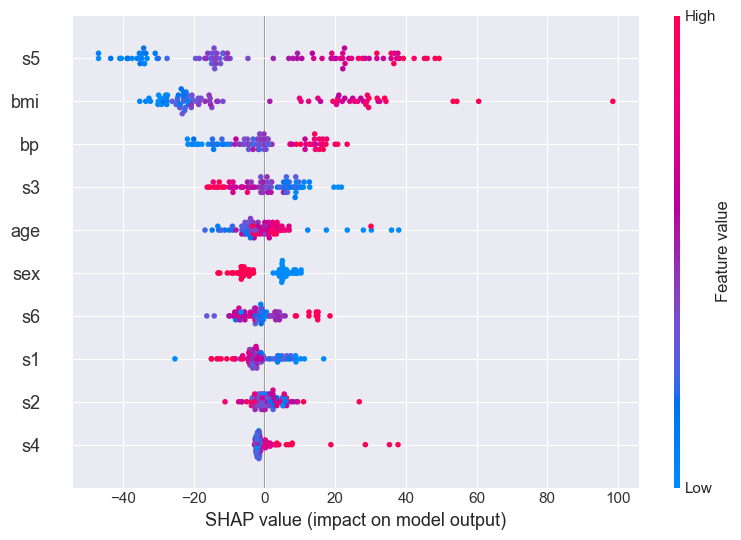

In [92]:
best_model = models["Gradient Boosting"]

import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values, X_test)
